In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
df = pd.read_csv('ab_stats.csv')

In [11]:
df.head()

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int64  
 2   purchase       23652 non-null  int64  
 3   ab_group       23652 non-null  object 
 4   av_site visit  23652 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 924.0+ KB


In [13]:
df.describe()

,revenue,num_purchases,purchase,av_site visit
count,23652.000000,23652.000000,23652.000000,23652.000000
mean,0.324689,0.043590,0.020717,7.013112
std,9.557730,1.079403,0.142438,3.154584
min,0.000000,0.000000,0.000000,-12.073486
25%,0.000000,0.000000,0.000000,5.173787
50%,0.000000,0.000000,0.000000,7.007936
75%,0.000000,0.000000,0.000000,8.864119
max,1303.609284,152.000000,1.000000,22.446822


In [14]:
df = df.astype({'purchase': bool})
df = df.astype({'num_purchases': np.int32})
df = df.rename(columns={'av_site visit':'av_site_visit'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23652 entries, 0 to 23651
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   revenue        23652 non-null  float64
 1   num_purchases  23652 non-null  int32  
 2   purchase       23652 non-null  bool   
 3   ab_group       23652 non-null  object 
 4   av_site_visit  23652 non-null  float64
dtypes: bool(1), float64(2), int32(1), object(1)
memory usage: 670.0+ KB


In [16]:
df.query('av_site_visit < 0')

,revenue,num_purchases,purchase,ab_group,av_site_visit
1789,0.0,0,False,A,-12.073486
1856,0.0,0,False,A,-0.683411
5122,0.0,0,False,A,-0.045455
7109,0.0,0,False,A,-12.073486
8118,0.0,0,False,A,-0.126946
...,...,...,...,...,...
23567,0.0,0,False,B,-3.901748
23606,0.0,0,False,B,-2.284448
23626,0.0,0,False,B,-3.528928
23634,0.0,0,False,B,-1.708265


In [17]:
round(df.query('av_site_visit < = 0').count()[0] / df.count()[0],2)

0.02

In [18]:
df_new = df.query('av_site_visit > 0')
df_new.describe()

,revenue,num_purchases,av_site_visit
count,23184.000000,23184.000000,23184.000000
mean,0.326511,0.043780,7.188254
std,9.645839,1.089462,2.924011
min,0.000000,0.000000,0.008679
25%,0.000000,0.000000,5.314379
50%,0.000000,0.000000,7.068656
75%,0.000000,0.000000,8.910900
max,1303.609284,152.000000,22.446822


In [19]:
df_new.ab_group.value_counts()

ab_group
A    11829
B    11355
Name: count, dtype: int64

In [20]:
df_new.query('ab_group == "A"').describe()

,revenue,num_purchases,av_site_visit
count,11829.000000,11829.000000,11829.000000
mean,0.404667,0.050723,6.980379
std,13.136545,1.467883,2.004450
min,0.000000,0.000000,0.145466
25%,0.000000,0.000000,5.657590
50%,0.000000,0.000000,6.984166
75%,0.000000,0.000000,8.346243
max,1303.609284,152.000000,17.728836


In [21]:
df_new.query('ab_group == "B"').describe()

,revenue,num_purchases,av_site_visit
count,11355.000000,11355.000000,11355.000000
mean,0.245093,0.036548,7.404806
std,3.192299,0.422820,3.630412
min,0.000000,0.000000,0.008679
25%,0.000000,0.000000,4.746728
50%,0.000000,0.000000,7.262590
75%,0.000000,0.000000,9.889165
max,113.830000,25.000000,22.446822


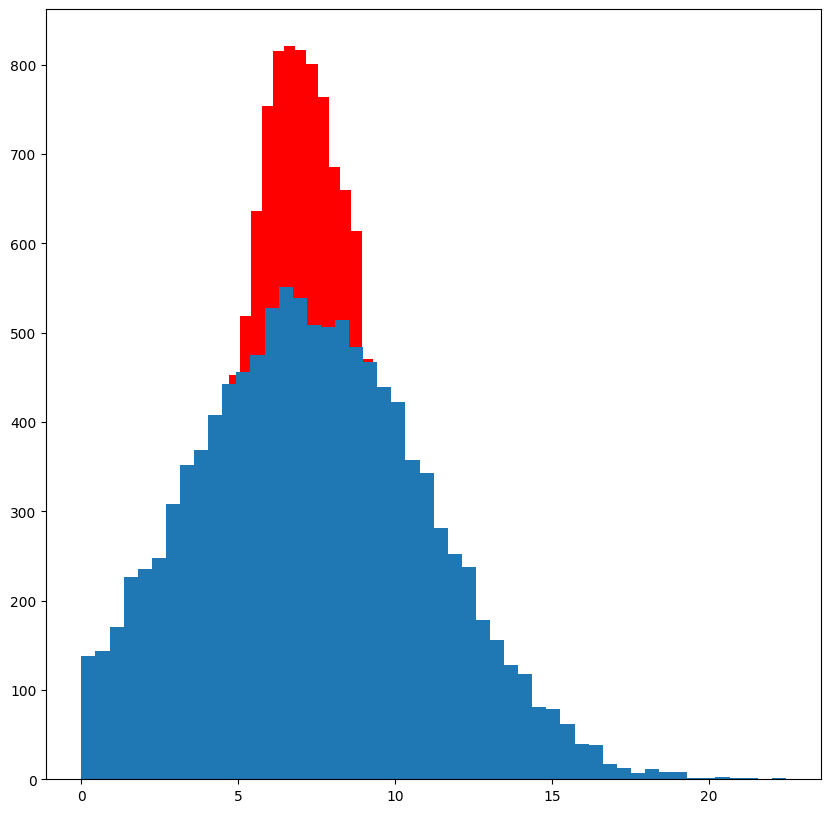

In [22]:
plt.figure(figsize=(10, 10))
A = df_new['av_site_visit'][df_new['ab_group'] == 'A']
B =df_new['av_site_visit'][df_new['ab_group'] == 'B']

plt.hist(A, color='r', bins=50)
plt.hist(B, bins=50)

plt.show()

In [23]:
stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=-10.957295422202266, pvalue=7.548128551839559e-28)

In [24]:
df.groupby('ab_group')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
ab_group,,,,,,,,
A,11835.0,0.404462,13.133218,0.0,0.0,0.0,0.0,1303.609284
B,11817.0,0.244794,3.176534,0.0,0.0,0.0,0.0,113.830000


In [26]:
mw_stats = stats.mannwhitneyu(x=df[(df['ab_group'] == 'A')&(df['purchase'] == True)]['revenue'].values, 
                              y=df[(df['ab_group'] == 'B')&(df['purchase'] == True)]['revenue'].values)
mw_stats

MannwhitneyuResult(statistic=29729.5, pvalue=0.8871956616344514)